In [2]:
import pandas as pd 

In [3]:
from pathlib import Path

base_path = Path("MIT_large_train")

train_path = base_path / "train"
test_path = base_path / "test"

def count_images(path):
    return len(list(path.rglob("*.jpg")))

num_train = count_images(train_path)
num_test = count_images(test_path)

print(f"Train images: {num_train}")
print(f"Test images: {num_test}")


Train images: 1881
Test images: 807


Class distribution (train):
coast: 244
forest: 227
highway: 184
inside_city: 214
mountain: 260
Opencountry: 292
street: 212
tallbuilding: 248


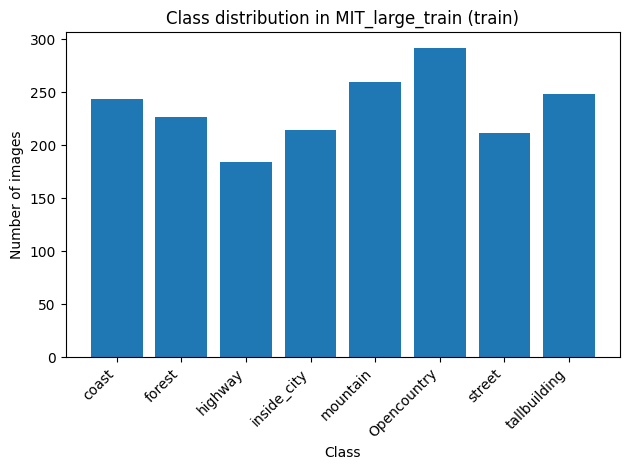

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

train_path = Path("MIT_large_train/train")

class_counts = Counter()

for class_dir in train_path.iterdir():
    if class_dir.is_dir():
        class_counts[class_dir.name] = len(list(class_dir.glob("*.jpg")))

print("Class distribution (train):")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Plot
plt.figure()
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45, ha="right")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Class distribution in MIT_large_train (train)")
plt.tight_layout()
plt.show()


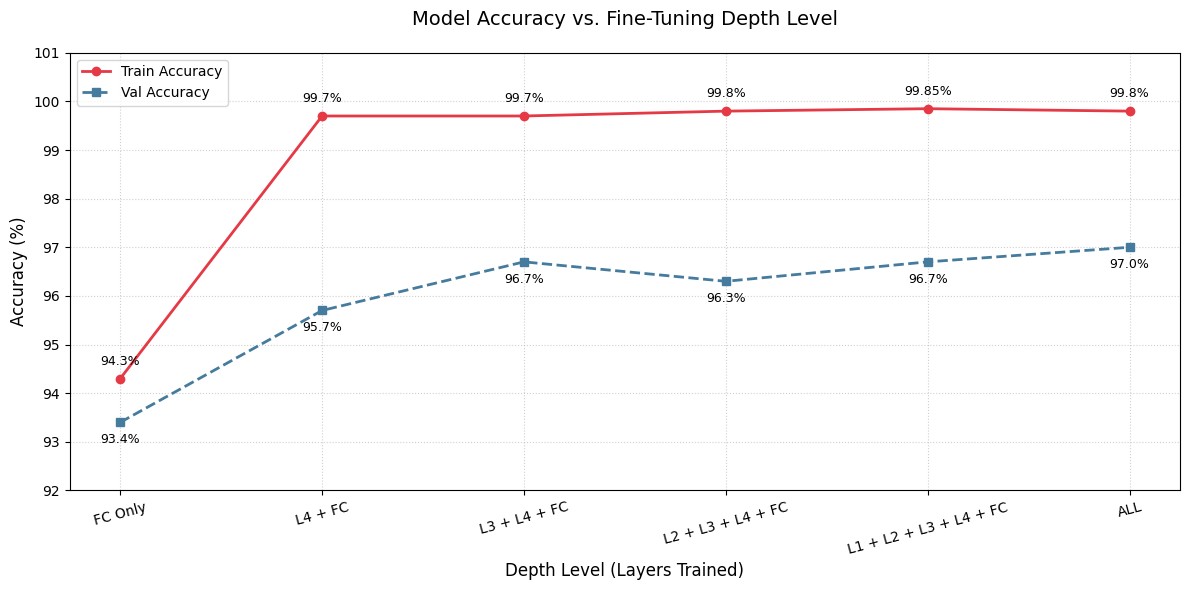

In [5]:
import matplotlib.pyplot as plt

# Datos extraídos de la imagen
labels = [
    "FC Only", 
    "L4 + FC", 
    "L3 + L4 + FC", 
    "L2 + L3 + L4 + FC", 
    "L1 + L2 + L3 + L4 + FC", 
    "ALL"
]

train_acc = [94.3, 99.7, 99.7, 99.8, 99.85, 99.8]
test_acc = [93.4, 95.7, 96.7, 96.3, 96.7, 97.0]

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Dibujar líneas
plt.plot(labels, train_acc, marker='o', linestyle='-', linewidth=2, label='Train Accuracy', color='#e63946')
plt.plot(labels, test_acc, marker='s', linestyle='--', linewidth=2, label='Val Accuracy', color='#457b9d')

# Añadir etiquetas de datos sobre los puntos
for i, txt in enumerate(train_acc):
    plt.annotate(f'{txt}%', (labels[i], train_acc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

for i, txt in enumerate(test_acc):
    plt.annotate(f'{txt}%', (labels[i], test_acc[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)

# Estética y títulos
plt.title('Model Accuracy vs. Fine-Tuning Depth Level', fontsize=14, pad=20)
plt.xlabel('Depth Level (Layers Trained)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(92, 101) # Ajustamos el límite para ver mejor la diferencia
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.xticks(rotation=15)

# Mostrar
plt.tight_layout()
plt.show()

C:\Users\xavipba\AppData\Local\Temp\ipykernel_19648\1366526233.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, rotation=20)


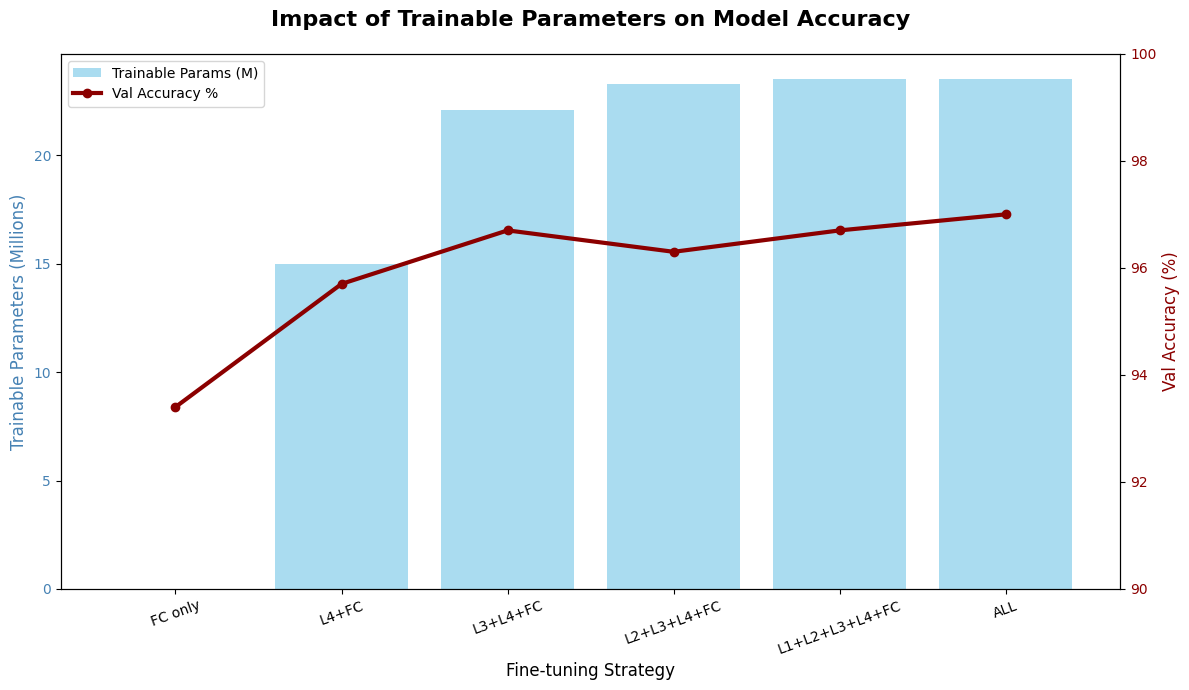

In [6]:
import matplotlib.pyplot as plt

# Datos integrados de ambas imágenes
labels = ["FC only", "L4+FC", "L3+L4+FC", "L2+L3+L4+FC", "L1+L2+L3+L4+FC", "ALL"]
trainable_params = [16392, 14981128, 22079496, 23299080, 23514888, 23514888]
test_accuracy = [93.4, 95.7, 96.7, 96.3, 96.7, 97.0]

fig, ax1 = plt.subplots(figsize=(12, 7))

# Eje 1: Barras para Parámetros
color_bar = 'skyblue'
ax1.set_xlabel('Fine-tuning Strategy', fontsize=12)
ax1.set_ylabel('Trainable Parameters (Millions)', color='steelblue', fontsize=12)
bars = ax1.bar(labels, [p/1e6 for p in trainable_params], color=color_bar, alpha=0.7, label='Trainable Params (M)')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Eje 2: Línea para Accuracy
ax2 = ax1.twinx()
color_line = 'darkred'
ax2.set_ylabel('Val Accuracy (%)', color=color_line, fontsize=12)
line = ax2.plot(labels, test_accuracy, color=color_line, marker='o', linewidth=3, label='Val Accuracy %')
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.set_ylim(90, 100)

# Títulos y formato
plt.title('Impact of Trainable Parameters on Model Accuracy', fontsize=16, fontweight='bold', pad=20)
ax1.set_xticklabels(labels, rotation=20)
fig.tight_layout()

# Añadir leyenda combinada
lines, labels_l = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels_l + labels2, loc='upper left')

plt.show()

FEATURE MAPS VISUALIZATION

Model loaded and set to eval mode
Image loaded: MIT_large_train/test/Opencountry/cdmc109.jpg

Extracted feature maps:
conv1    -> (1, 64, 112, 112)
layer1   -> (1, 256, 56, 56)
layer2   -> (1, 512, 28, 28)
layer3   -> (1, 1024, 14, 14)
layer4   -> (1, 2048, 7, 7)


c:\Users\xavipba\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


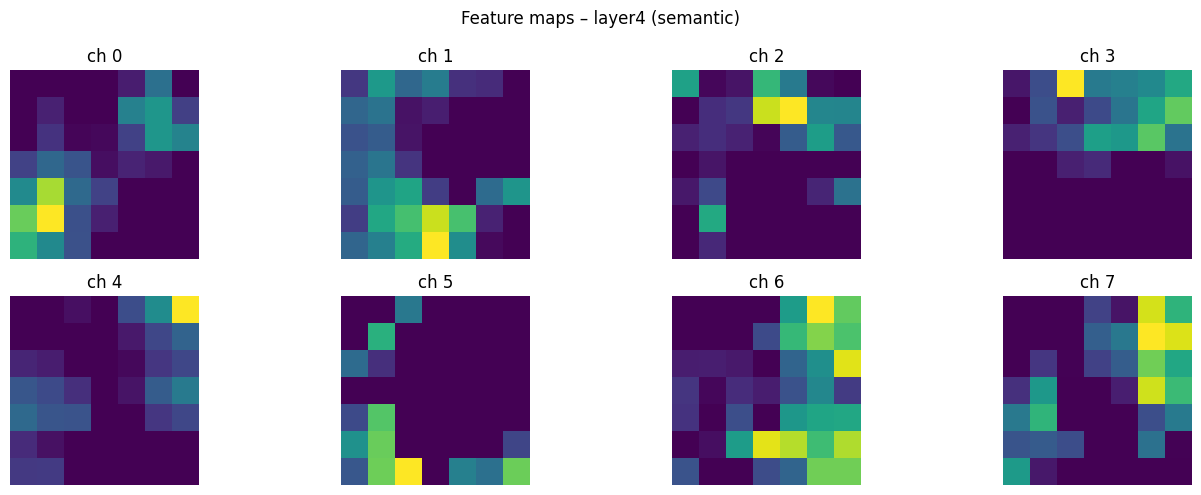

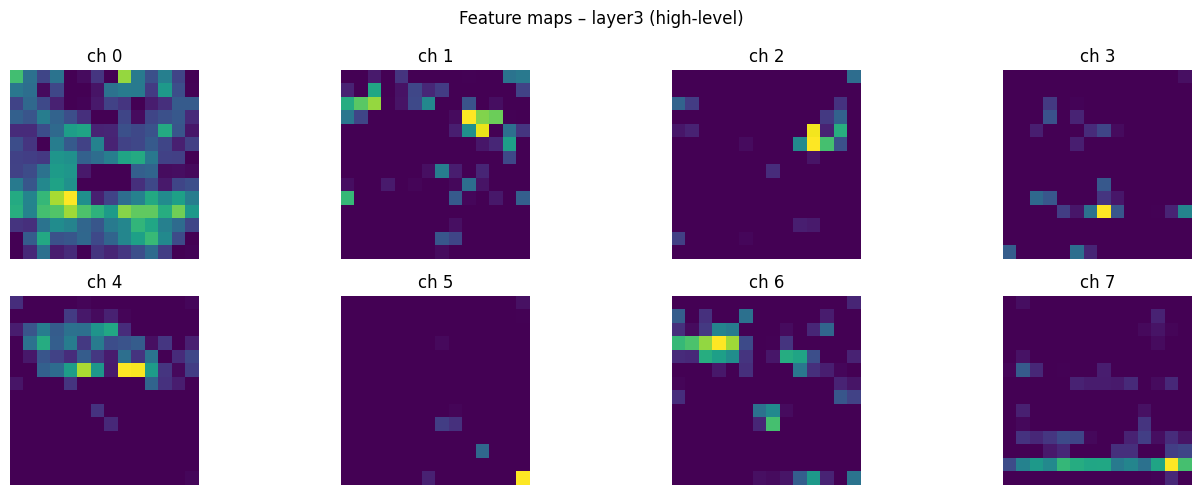

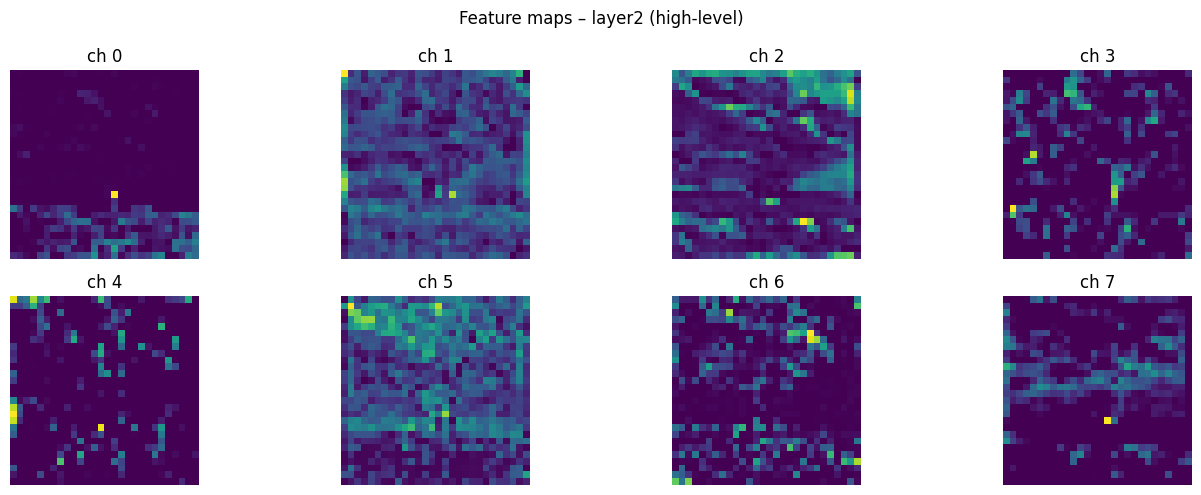

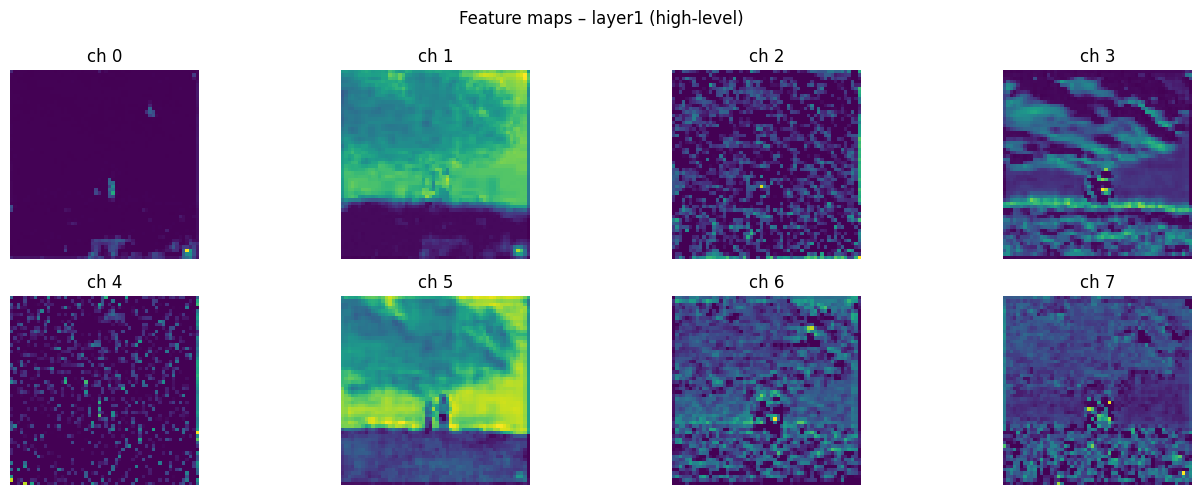

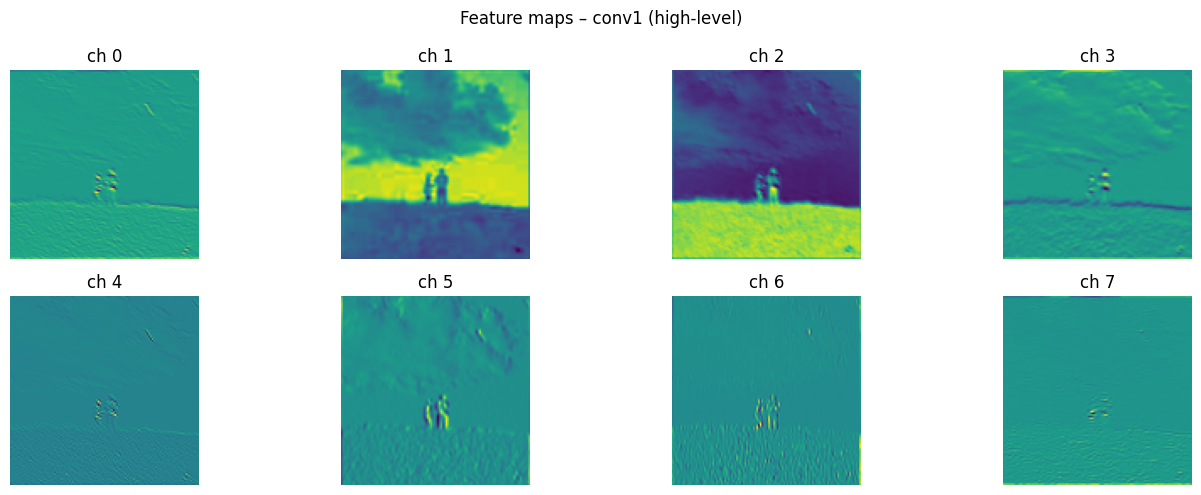

In [7]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.v2 as F
from models import ResNet50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=8, feature_extraction=False).to(device)

state_dict = torch.load(
    "models/baseline.pth",
    map_location=device
)
model.load_state_dict(state_dict)
model.eval()

print("Model loaded and set to eval mode")

img_path = "MIT_large_train/test/Opencountry/cdmc109.jpg"

transform = F.Compose([
    F.Resize(256),
    F.CenterCrop(224),
    F.ToTensor(),
    F.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

img = Image.open(img_path).convert("RGB")
x = transform(img).unsqueeze(0).to(device)  # (1, 3, 224, 224)

print("Image loaded:", img_path)

layers = [
    "conv1",
    "layer1",
    "layer2",
    "layer3",
    "layer4",
]

features = model.extract_features_from_hooks(x, layers)

# Print shapes
print("\nExtracted feature maps:")
for k, v in features.items():
    print(f"{k:8s} -> {tuple(v.shape)}")

def plot_feature_maps(fmap, title, n_channels=8):
    fmap = fmap[0].detach().cpu()  # (C, H, W)

    fig, axes = plt.subplots(2, n_channels // 2, figsize=(14, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(fmap[i], cmap="viridis")
        ax.set_title(f"ch {i}")
        ax.axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot layer4 feature maps
plot_feature_maps(
    features["layer4"],
    title="Feature maps – layer4 (semantic)"
)

plot_feature_maps(
    features["layer3"],
    title="Feature maps – layer3 (high-level)"
)
plot_feature_maps(
    features["layer2"],
    title="Feature maps – layer2 (high-level)"
)
plot_feature_maps(
    features["layer1"],
    title="Feature maps – layer1 (high-level)"
)

plot_feature_maps(
    features["conv1"],
    title="Feature maps – conv1 (high-level)"
)

WEIGHTS VISUALIZATION

First convolution layer found:
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
Weight shape: torch.Size([64, 3, 7, 7])


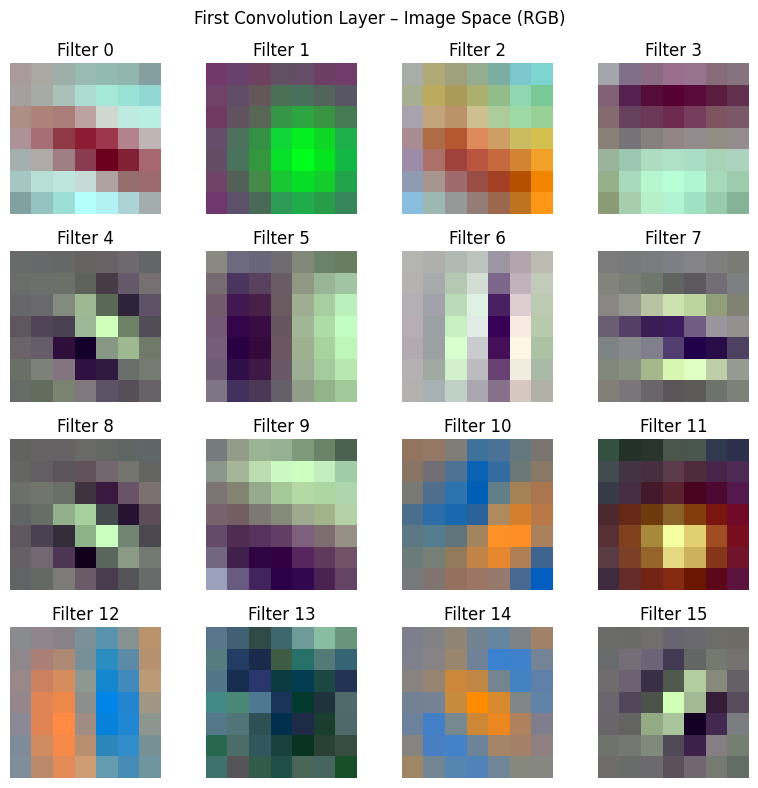

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

first_conv = None
for m in model.modules():
    if isinstance(m, nn.Conv2d) and m.in_channels == 3:
        first_conv = m
        break

if first_conv is None:
    raise RuntimeError("No Conv2d layer with 3 input channels found")

print("First convolution layer found:")
print(first_conv)
print("Weight shape:", first_conv.weight.shape)

weights = first_conv.weight.detach().cpu()
def normalize(w):
    w_min = w.min()
    w_max = w.max()
    return (w - w_min) / (w_max - w_min + 1e-8)

n_show = min(16, weights.shape[0])

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
axes = axes.flatten()

for i in range(n_show):
    filt = weights[i].permute(1, 2, 0)
    filt = normalize(filt)

    axes[i].imshow(filt)
    axes[i].axis("off")
    axes[i].set_title(f"Filter {i}")

plt.suptitle("First Convolution Layer – Image Space (RGB)")
plt.tight_layout()
plt.show()


Weights shape: torch.Size([256, 256, 3, 3])


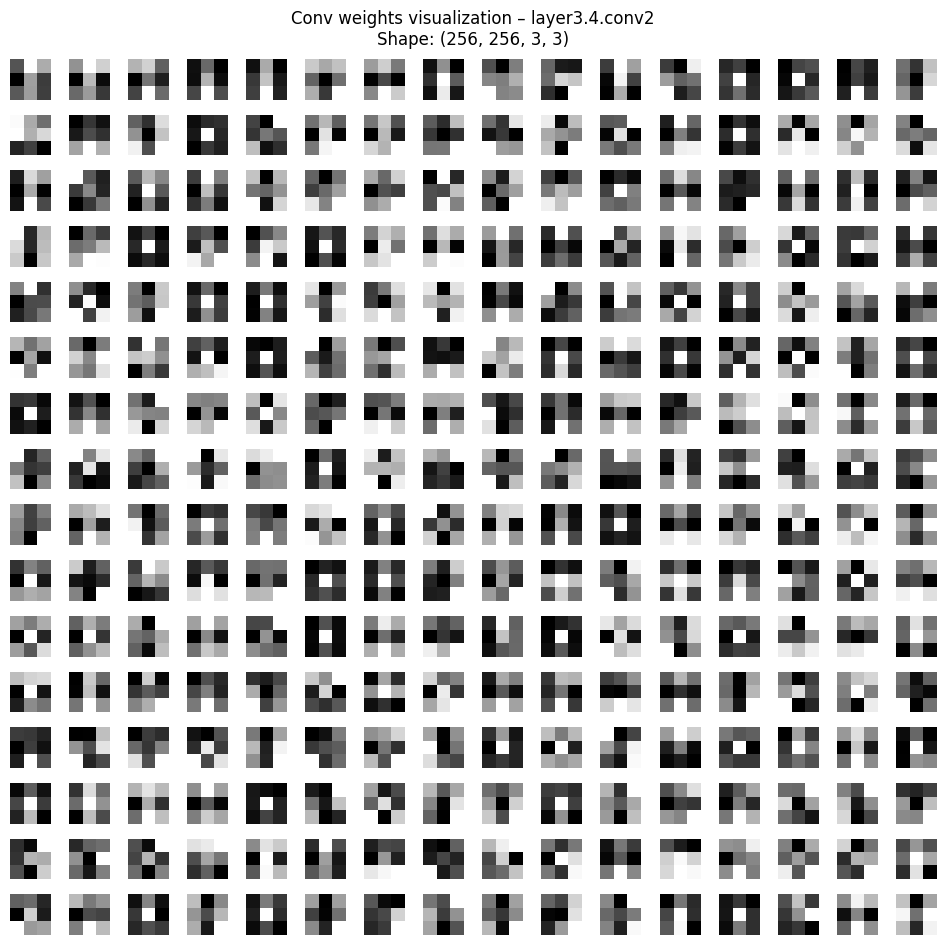

In [9]:
import torch
import matplotlib.pyplot as plt
import math

conv_layer = model.backbone.layer3[4].conv2
weights = conv_layer.weight.detach().cpu()
out_c, in_c, kH, kW = weights.shape

print(f"Weights shape: {weights.shape}")
weights_2d = torch.norm(weights, dim=1)
cols = int(math.sqrt(out_c))
rows = math.ceil(out_c / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 0.6, rows * 0.6))
axes = axes.flatten()

for i in range(out_c):
    axes[i].imshow(weights_2d[i], cmap="gray")
    axes[i].axis("off")

for i in range(out_c, len(axes)):
    axes[i].axis("off")

plt.suptitle(
    f"Conv weights visualization – layer3.4.conv2\n"
    f"Shape: ({out_c}, {in_c}, {kH}, {kW})",
    fontsize=12
)
plt.tight_layout()
plt.show()


VISUALIZATION FEATURE EXTRACTION (executed in kaggle because of gpu)

In [ ]:
from utils import make_data_loaders
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from tqdm import tqdm

dataset_path = "MIT_large_train"
train_loader, test_loader = make_data_loaders(
    dataset_path,
    False,
    [1, 16],
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50(num_classes=8, feature_extraction=False).to(device)
state_dict = torch.load("models/best_layers_conf.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

features = []
labels_list = []

def hook_fn(module, input, output):
    features.append(output.view(output.size(0), -1).detach().cpu().numpy())

handle = model.backbone.avgpool.register_forward_hook(hook_fn)

print("🚀 Extrayendo características para t-SNE...")
with torch.no_grad():
    for imgs, labels in tqdm(test_loader):
        imgs = imgs.to(device)
        model(imgs)
        labels_list.append(labels.numpy())

handle.remove()
X = np.concatenate(features, axis=0)
y = np.concatenate(labels_list, axis=0)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))

class_names = test_loader.dataset.classes 

scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.6, edgecolors='w')

legend_elements = scatter.legend_elements()[0]
plt.legend(handles=legend_elements, labels=class_names, title="Categories")

plt.title("t-SNE Visualization: ResNet50 Feature Space", fontsize=14)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


DATA AUGMENTATION TRANSFORMATIONS

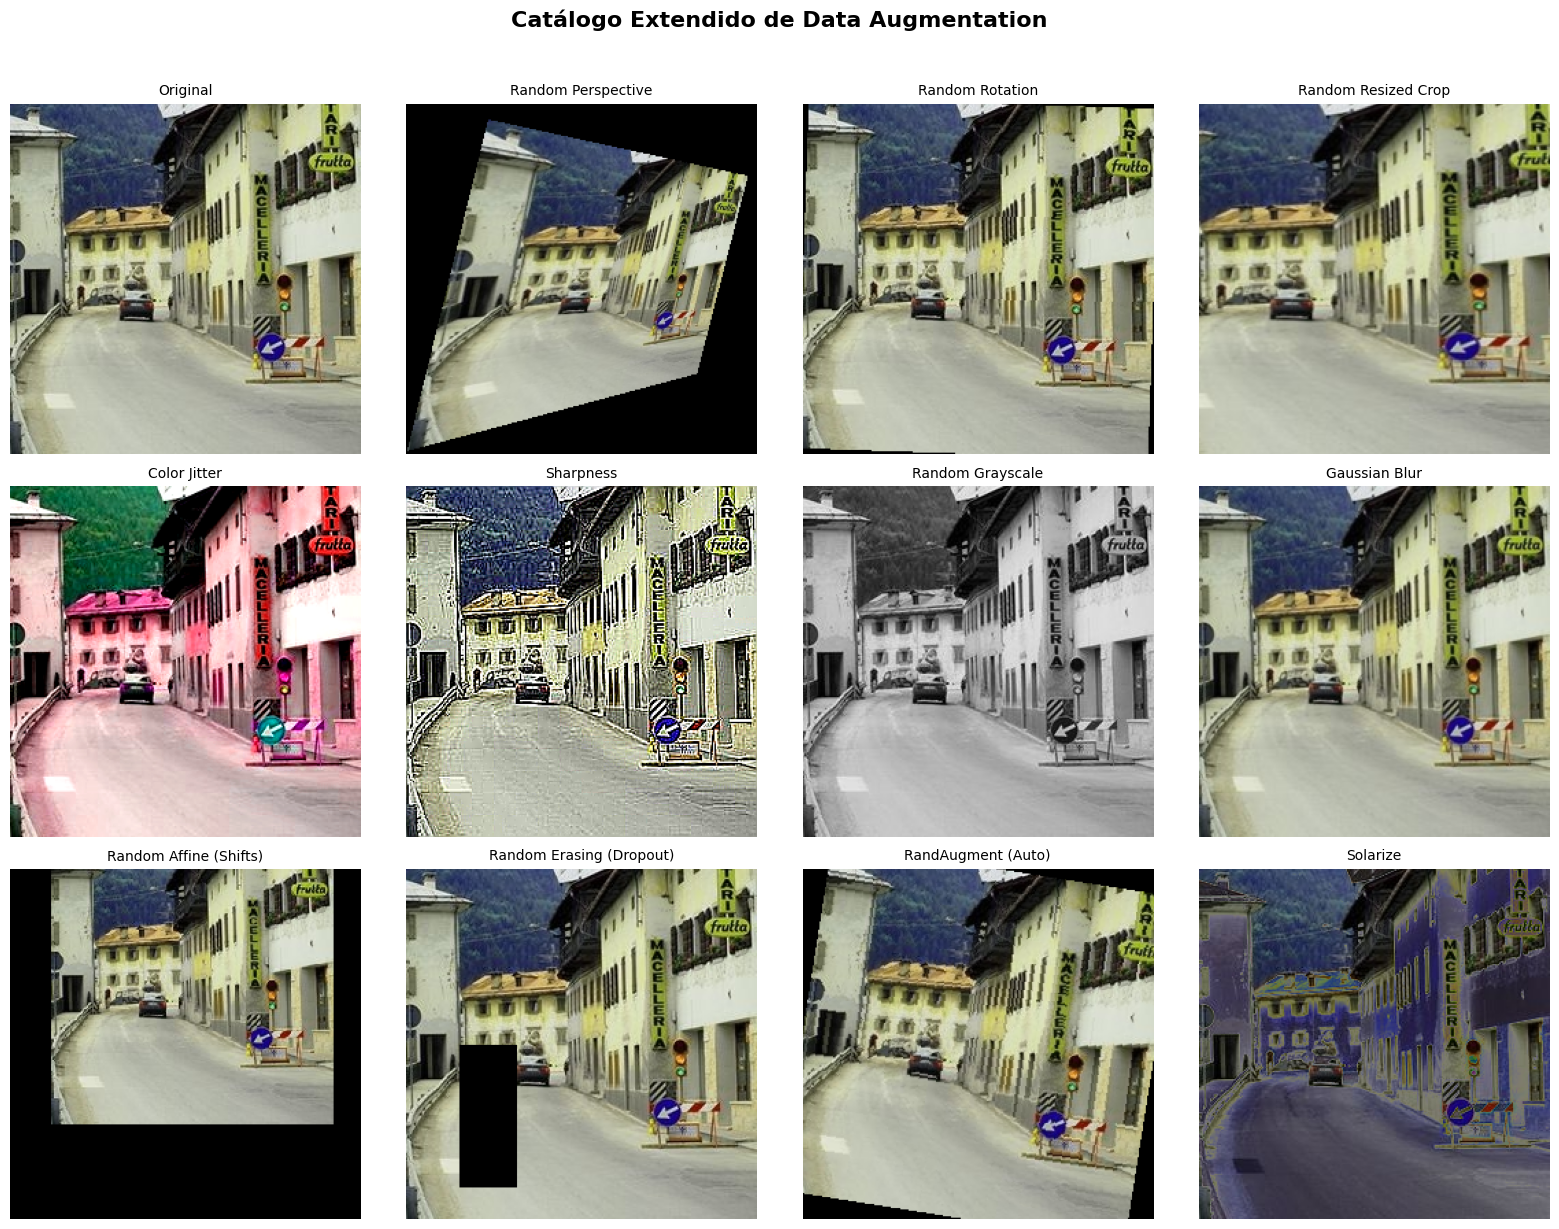

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T

# 1. Cargar la imagen
img_path = "MIT_small_train_1/train/street/a79094.jpg"
try:
    img = Image.open(img_path).convert("RGB")
except FileNotFoundError:
    print("Asegúrate de que la ruta de la imagen sea correcta.")
    # Creamos una imagen dummy por si no encuentra el archivo para que el código no falle
    img = Image.new('RGB', (224, 224), color = (73, 109, 137))

# 2. Definir el diccionario extendido de transformaciones
augmentations = {
    "Original": T.Compose([]),

    "Random Perspective": T.Compose([
        T.RandomPerspective(distortion_scale=0.5, p=1.0)
    ]),

    "Random Rotation": T.Compose([
        T.RandomRotation(degrees=30)
    ]),

    "Random Resized Crop": T.Compose([
        T.RandomResizedCrop(size=224, scale=(0.5, 1.0))
    ]),

    "Color Jitter": T.Compose([
        T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.2)
    ]),

    "Sharpness": T.Compose([
        T.RandomAdjustSharpness(sharpness_factor=10, p=1.0)
    ]),

    "Random Grayscale": T.Compose([
        T.RandomGrayscale(p=1.0)
    ]),

    "Gaussian Blur": T.Compose([
        T.GaussianBlur(kernel_size=11, sigma=(0.1, 2.0))
    ]),

    "Random Affine (Shifts)": T.Compose([
        T.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.8, 1.2))
    ]),

    "Random Erasing (Dropout)": T.Compose([
        T.ToTensor(),
        T.RandomErasing(p=1.0, scale=(0.02, 0.2), ratio=(0.3, 3.3), value=0),
        T.ToPILImage()
    ]),

    "RandAugment (Auto)": T.Compose([
        T.RandAugment()
    ]),

    "Solarize": T.Compose([
        T.RandomSolarize(threshold=128, p=1.0)
    ])
}

# 3. Aplicar las transformaciones
images = {}
for name, transform in augmentations.items():
    images[name] = transform(img)

# 4. Configuración de la visualización (Grid Dinámico)
cols = 4
rows = (len(images) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for ax, (name, im) in zip(axes, images.items()):
    ax.imshow(im)
    ax.set_title(name, fontsize=10)
    ax.axis("off")

# Ocultar ejes vacíos si los hay
for ax in axes[len(images):]:
    ax.axis("off")

plt.suptitle("Catálogo Extendido de Data Augmentation", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

PLOTS

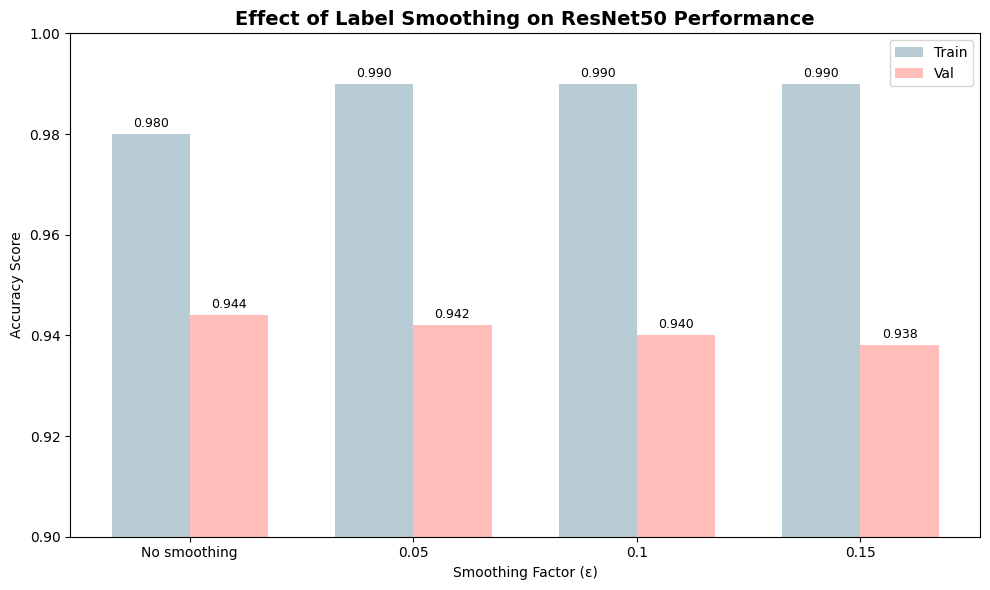

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your experiments
labels = ['No smoothing', '0.05', '0.1', '0.15']
train_acc = [0.98, 0.990, 0.990, 0.990]
val_acc = [0.944, 0.942, 0.940, 0.938]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Pastel colors
train_color = '#AEC6CF'  # pastel blue
val_color = '#FFB7B2'    # pastel red / pink

rects1 = ax.bar(x - width/2, train_acc, width,
                label='Train', color=train_color, alpha=0.9)
rects2 = ax.bar(x + width/2, val_acc, width,
                label='Val', color=val_color, alpha=0.9)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title('Effect of Label Smoothing on ResNet50 Performance',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Smoothing Factor (ε)')
ax.legend()

# Zoom Y-axis
ax.set_ylim(0.9, 1.0)

def autolabel(rects):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


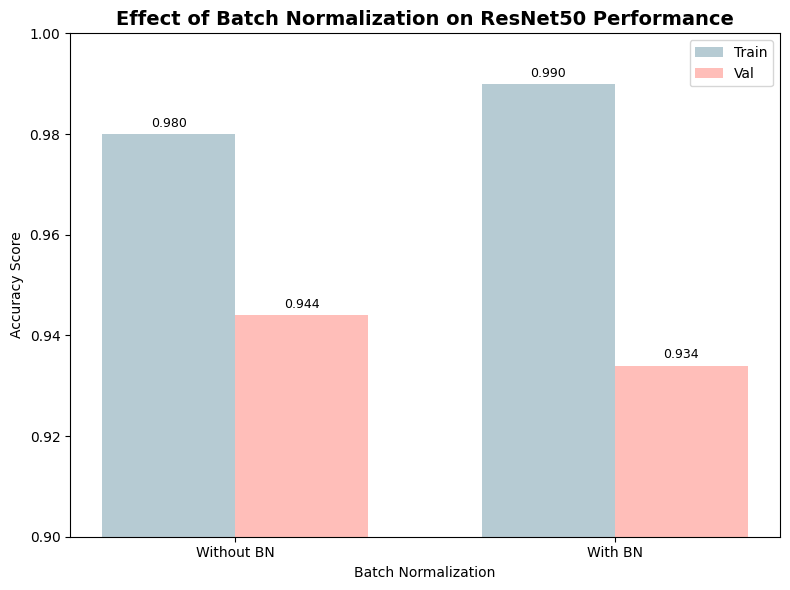

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your experiments
labels = ['Without BN', 'With BN']
train_acc = [0.980, 0.990]
val_acc = [0.944, 0.934]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 6))

# Pastel colors
train_color = '#AEC6CF'  # pastel blue
val_color = '#FFB7B2'    # pastel red / pink

rects1 = ax.bar(x - width/2, train_acc, width,
                label='Train', color=train_color, alpha=0.9)
rects2 = ax.bar(x + width/2, val_acc, width,
                label='Val', color=val_color, alpha=0.9)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title('Effect of Batch Normalization on ResNet50 Performance',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Batch Normalization')
ax.legend()

# Zoom Y-axis
ax.set_ylim(0.9, 1.0)

def autolabel(rects):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


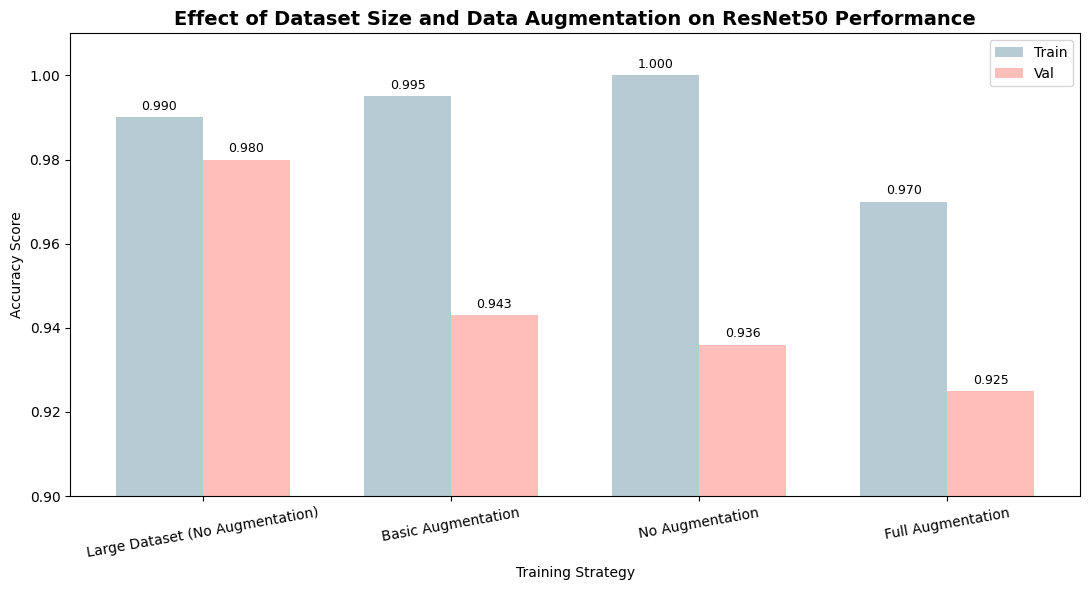

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental results
labels = [
    'Large Dataset (No Augmentation)',
    'Basic Augmentation',
    'No Augmentation',
    'Full Augmentation'
]

train_acc = np.array([0.990, 0.995, 1.000, 0.970])
val_acc   = np.array([0.980, 0.943, 0.936, 0.925])

# --------------------------------------------------
# Sort by validation accuracy (descending)
# --------------------------------------------------
order = np.argsort(-val_acc)
labels = [labels[i] for i in order]
train_acc = train_acc[order]
val_acc = val_acc[order]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))

# Pastel colors
train_color = '#AEC6CF'  # pastel blue
val_color   = '#FFB7B2'  # pastel pink

rects1 = ax.bar(
    x - width/2, train_acc, width,
    label='Train', color=train_color, alpha=0.9
)
rects2 = ax.bar(
    x + width/2, val_acc, width,
    label='Val', color=val_color, alpha=0.9
)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title(
    'Effect of Dataset Size and Data Augmentation on ResNet50 Performance',
    fontsize=14, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=10)
ax.set_xlabel('Training Strategy')
ax.legend()

# Zoom Y-axis to highlight generalization gap
ax.set_ylim(0.9, 1.01)

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


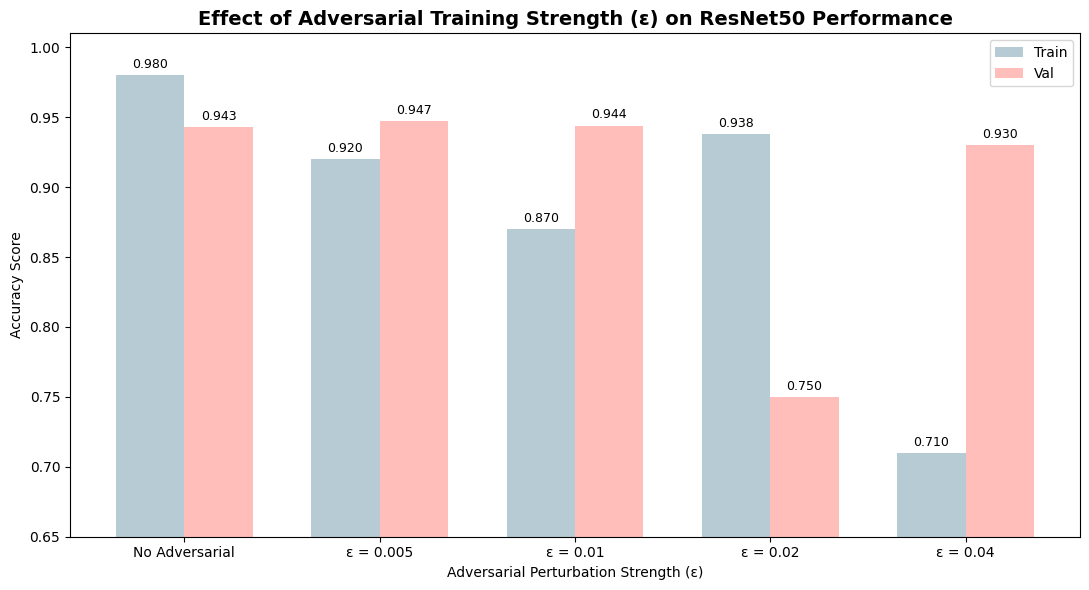

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental results
labels = ['No Adversarial', 'ε = 0.005', 'ε = 0.01', 'ε = 0.02', 'ε = 0.04']
train_acc = [0.980, 0.920, 0.870, 0.938, 0.710]
val_acc   = [0.943, 0.947, 0.944, 0.750, 0.930]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))

# Pastel colors (same as previous plots)
train_color = '#AEC6CF'  # pastel blue
val_color   = '#FFB7B2'  # pastel pink

rects1 = ax.bar(
    x - width/2, train_acc, width,
    label='Train', color=train_color, alpha=0.9
)
rects2 = ax.bar(
    x + width/2, val_acc, width,
    label='Val', color=val_color, alpha=0.9
)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title(
    'Effect of Adversarial Training Strength (ε) on ResNet50 Performance',
    fontsize=14, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Adversarial Perturbation Strength (ε)')
ax.legend()

# Zoom Y-axis to highlight differences
ax.set_ylim(0.65, 1.01)

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


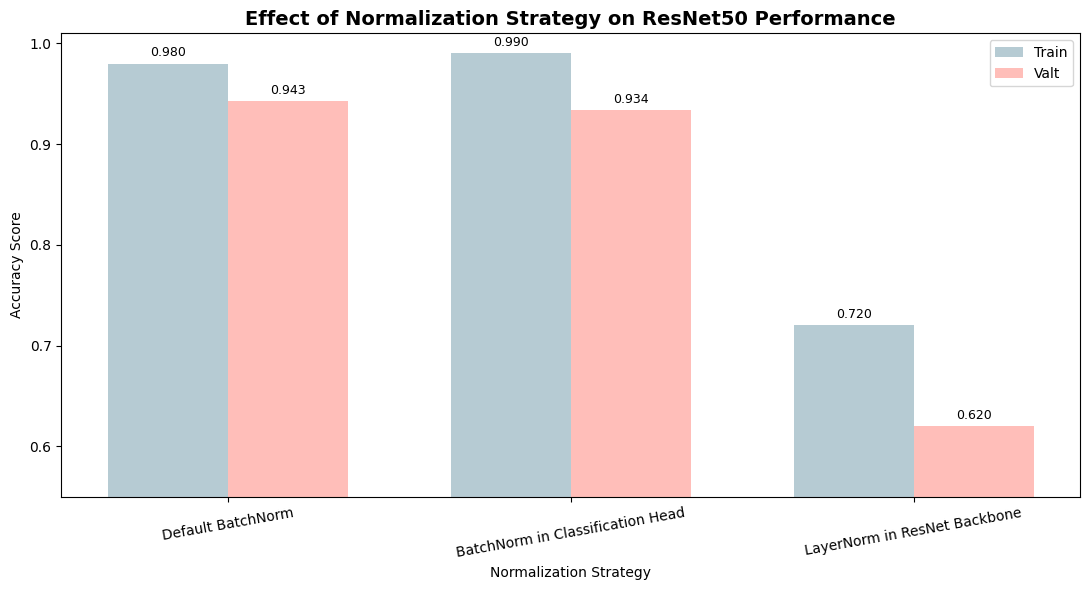

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental results
labels = [
    'Default BatchNorm',
    'BatchNorm in Classification Head',
    'LayerNorm in ResNet Backbone'
]

train_acc = [0.980, 0.990, 0.720]
val_acc   = [0.943, 0.934, 0.620]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))

# Pastel colors (consistent with previous plots)
train_color = '#AEC6CF'  # pastel blue
val_color   = '#FFB7B2'  # pastel pink

rects1 = ax.bar(
    x - width/2, train_acc, width,
    label='Train', color=train_color, alpha=0.9
)
rects2 = ax.bar(
    x + width/2, val_acc, width,
    label='Valt', color=val_color, alpha=0.9
)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title(
    'Effect of Normalization Strategy on ResNet50 Performance',
    fontsize=14, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=10)
ax.set_xlabel('Normalization Strategy')
ax.legend()

# Y-axis range to highlight differences
ax.set_ylim(0.55, 1.01)

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


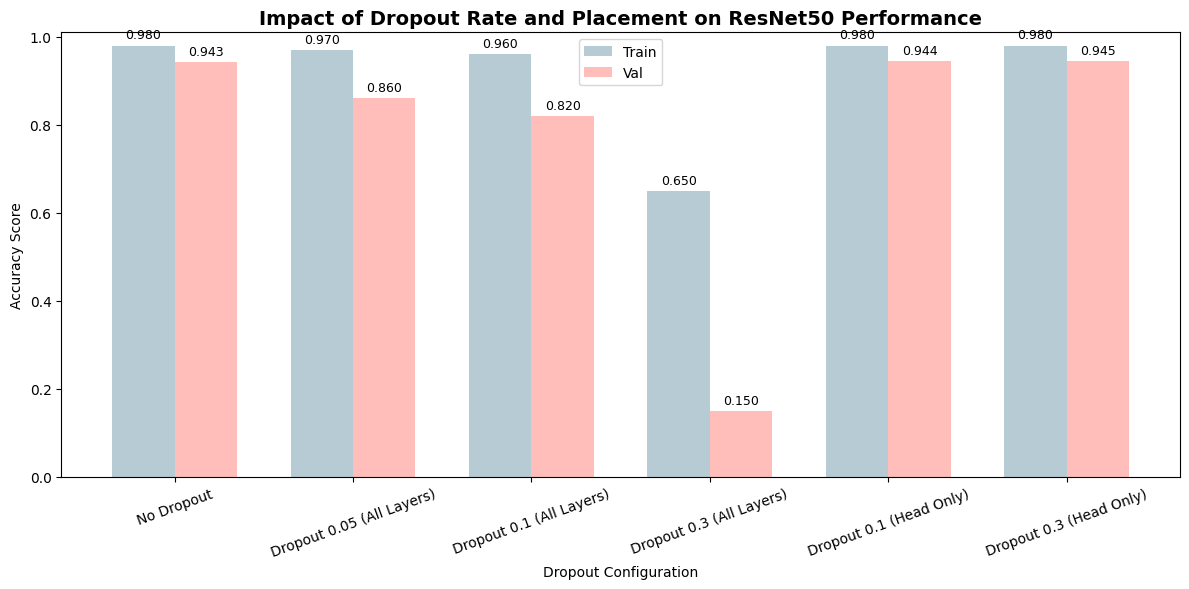

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental results
labels = [
    'No Dropout',
    'Dropout 0.05 (All Layers)',
    'Dropout 0.1 (All Layers)',
    'Dropout 0.3 (All Layers)',
    'Dropout 0.1 (Head Only)',
    'Dropout 0.3 (Head Only)'
]

train_acc = [0.980, 0.970, 0.960, 0.650, 0.980, 0.980]
val_acc   = [0.943, 0.860, 0.820, 0.150, 0.944, 0.945]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Pastel colors (consistent with previous plots)
train_color = '#AEC6CF'  # pastel blue
val_color   = '#FFB7B2'  # pastel pink

rects1 = ax.bar(
    x - width/2, train_acc, width,
    label='Train', color=train_color, alpha=0.9
)
rects2 = ax.bar(
    x + width/2, val_acc, width,
    label='Val', color=val_color, alpha=0.9
)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title(
    'Impact of Dropout Rate and Placement on ResNet50 Performance',
    fontsize=14, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.set_xlabel('Dropout Configuration')
ax.legend()

# Y-axis range to highlight differences
ax.set_ylim(0.0, 1.01)

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


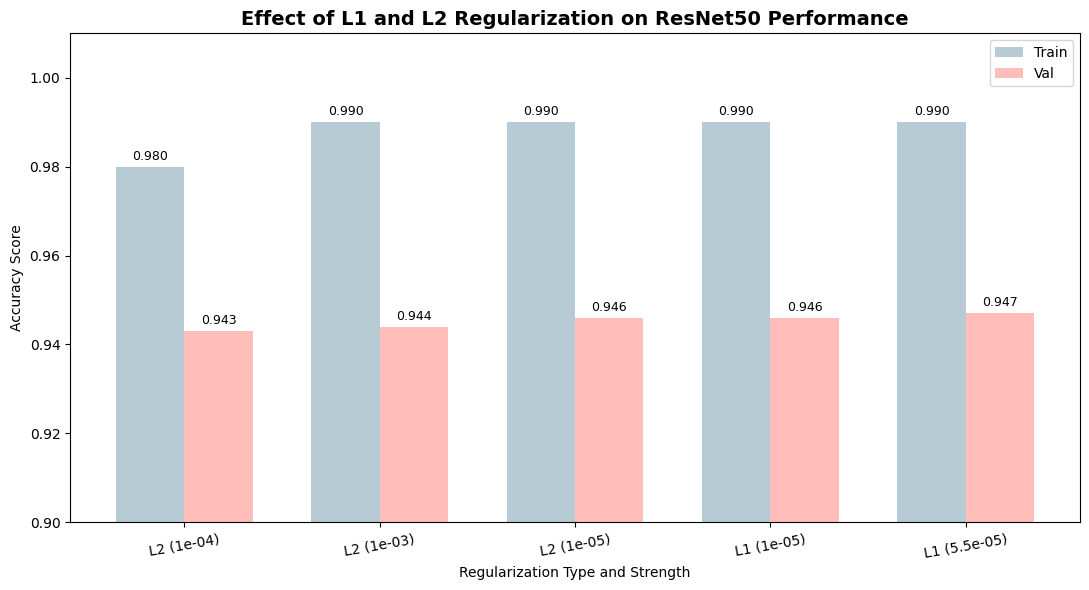

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Experimental results
labels = [
    'L2 (1e-04)',
    'L2 (1e-03)',
    'L2 (1e-05)',
    'L1 (1e-05)',
    'L1 (5.5e-05)'
]

train_acc = [0.980, 0.990, 0.990, 0.990, 0.990]
val_acc   = [0.943, 0.944, 0.946, 0.946, 0.947]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 6))

# Pastel colors (same palette as before)
train_color = '#AEC6CF'  # pastel blue
val_color   = '#FFB7B2'  # pastel pink

rects1 = ax.bar(
    x - width/2, train_acc, width,
    label='Train', color=train_color, alpha=0.9
)
rects2 = ax.bar(
    x + width/2, val_acc, width,
    label='Val', color=val_color, alpha=0.9
)

# Labels and title
ax.set_ylabel('Accuracy Score')
ax.set_title(
    'Effect of L1 and L2 Regularization on ResNet50 Performance',
    fontsize=14, fontweight='bold'
)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=10)
ax.set_xlabel('Regularization Type and Strength')
ax.legend()

# Y-axis range to highlight subtle differences
ax.set_ylim(0.9, 1.01)

# Annotate bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.3f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=9
        )

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
